<a href="https://colab.research.google.com/github/Armybrat21/PRODIGY_DS_04/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
data = pd.read_csv('twitter_training.csv')

In [4]:
data.head
print(data.head())

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15836 entries, 0 to 15835
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   15836 non-null  int64 
 1   Borderlands                                            15836 non-null  object
 2   Positive                                               15836 non-null  object
 3   im getting on borderlands and i will murder you all ,  15675 non-null  object
dtypes: int64(1), object(3)
memory usage: 495.0+ KB
None


In [6]:
def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    stop = stopwords.words('english')
    text = ' '.join([word for word in text.split() if word not in stop])
    return text

In [7]:
data['text'] = data[data.columns[3]].astype(str).apply(clean_text)

In [8]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [9]:
data['sentiment_score'] = data['text'].apply(get_sentiment)

In [10]:
data['sentiment'] = data['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

In [11]:
print(data['sentiment'].value_counts())

sentiment
positive    7091
negative    4528
neutral     4217
Name: count, dtype: int64


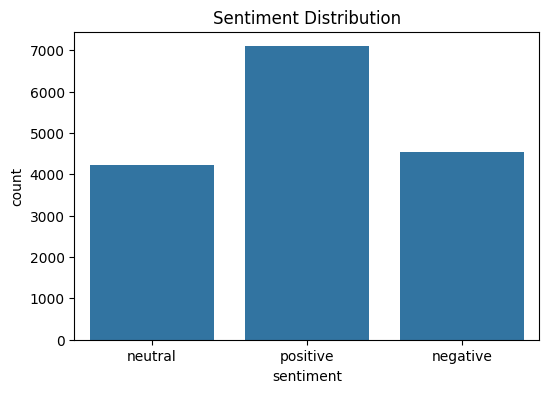

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=data)
plt.title('Sentiment Distribution')
plt.show()